### Recurrent Neural Networks (RNNs):

Recurrent Neural Networks (RNNs) are a class of neural networks designed to work with sequential data.
 Unlike traditional feedforward neural networks, RNNs have connections that form directed cycles, allowing them to exhibit dynamic temporal behavior.
 This makes them well-suited for tasks involving sequences, such as time series prediction, natural language processing, speech recognition, and more.

#### Key Components of RNNs:

1. **Recurrent Connections:** RNNs maintain a hidden state that captures information
 about previous inputs in the sequence. This hidden state is updated recursively at each time step,
 allowing the network to remember past information while processing new inputs.

2. **Time Unfolding:** To understand how RNNs process sequences, it's common to "unfold" the network over time,
creating a chain-like structure where each node represents the network's state at a particular time step.

3. **Long Short-Term Memory (LSTM) and Gated Recurrent Unit (GRU):**
 Standard RNNs suffer from the vanishing gradient problem, which limits their ability to capture long-term dependencies in sequences.
 LSTM and GRU are two popular variants of RNNs that address this issue by incorporating gating mechanisms to selectively update and forget information over time.

#### Project Source Code:

Now, let's create a simple project source code using TensorFlow/Keras to demonstrate how to implement an RNN for time series prediction.

**Step 1: Import Libraries**
```python
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
```

**Step 2: Generate Synthetic Data**
```python
# Generate synthetic data (sine wave)
def generate_data(n_samples, n_timesteps):
    X = np.linspace(0, 2*np.pi, n_samples*n_timesteps)
    y = np.sin(X)
    return X.reshape(n_samples, n_timesteps, 1), y.reshape(n_samples, n_timesteps, 1)

n_samples = 1000
n_timesteps = 20
X_train, y_train = generate_data(n_samples, n_timesteps)
```

**Step 3: Build RNN Model**
```python
model = Sequential([
    SimpleRNN(10, input_shape=(n_timesteps, 1), activation='relu'),
    Dense(1)
])
```

**Step 4: Compile the Model**
```python
model.compile(optimizer='adam', loss='mse')
```

**Step 5: Train the Model**
```python
model.fit(X_train, y_train, epochs=10, batch_size=32)
```

**Step 6: Evaluate the Model**
```python
X_test, y_test = generate_data(1, n_timesteps)
predicted_values = model.predict(X_test)

# Plot actual vs predicted values
import matplotlib.pyplot as plt
plt.plot(X_test.flatten(), y_test.flatten(), label='Actual')
plt.plot(X_test.flatten(), predicted_values.flatten(), label='Predicted')
plt.legend()
plt.show()
```

This simple project demonstrates how to create an RNN using TensorFlow/Keras for time series prediction. It generates synthetic sine wave data, builds an RNN model with a SimpleRNN layer, compiles the model, trains it on the data, and evaluates the predictions visually.
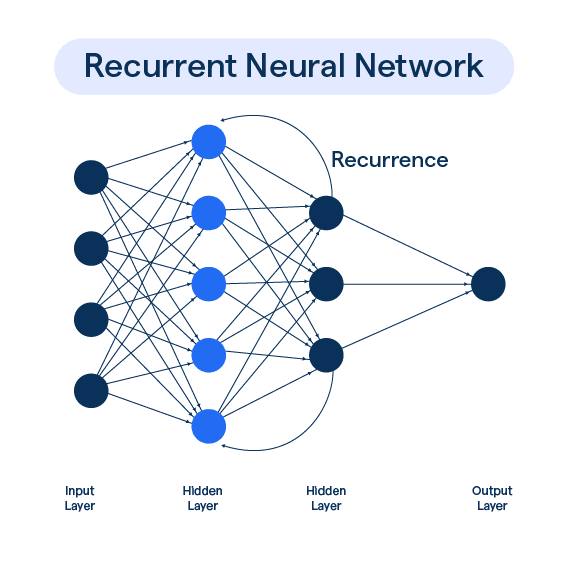

In [ ]:
!pip install tensorflow

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 1.9949
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.0592
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.5908
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3376
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.1544
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0614
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0479
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0505
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0474
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0433
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


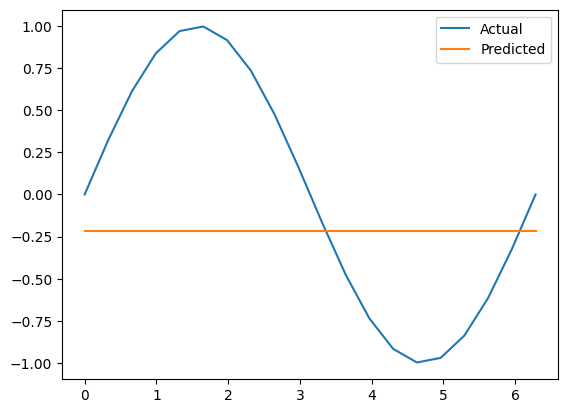

In [ ]:

import tensorflow as tf
import numpy as np
n_samples = 1000
n_timesteps = 20

model = tf.keras.models.Sequential([
    tf.keras.layers.SimpleRNN(10, input_shape=(n_timesteps, 1), activation='relu'),
    tf.keras.layers.Dense(1)
])

# Generate synthetic data (sine wave)
def generate_data(n_samples, n_timesteps):
    X = np.linspace(0, 2*np.pi, n_samples*n_timesteps)
    y = np.sin(X)
    return X.reshape(n_samples, n_timesteps, 1), y.reshape(n_samples, n_timesteps, 1)


X_train, y_train = generate_data(n_samples, n_timesteps)

model.compile(optimizer='adam', loss='mse')

model.fit(X_train, y_train, epochs=10, batch_size=32)

X_test, y_test = generate_data(1, n_timesteps)
predicted_values = model.predict(X_test)

# Reshape predicted_values to match y_test
predicted_values = predicted_values.repeat(n_timesteps, axis=1) # Repeat the predicted value for each timestep

# Plot actual vs predicted values
import matplotlib.pyplot as plt
plt.plot(X_test.flatten(), y_test.flatten(), label='Actual')
plt.plot(X_test.flatten(), predicted_values.flatten(), label='Predicted')
plt.legend()
plt.show()